# SVM from Scratch

In [68]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import precision_score,accuracy_score

In [67]:
class SVM:
    def __init__(self,lr,lambdap,iters) -> None:
        self.weight=None
        self.bias=None
        self.lr=lr
        self.lambdap=lambdap
        self.iters=iters

    def fit(self,X,Y):
        y=np.where(Y<=0,-1,1)
        sample,feature=X.shape

        self.weight=np.zeros(feature)
        self.bias=0

        for i in range(self.iters):
            for idx,xi in enumerate(X):
                if y[idx]*(np.dot(self.weight,xi)-self.bias) >=1 :
                    dw=2*self.lambdap*self.weight
                    db=0
                else:
                    dw = 2 * self.lambdap * self.weight - np.dot(xi, y[idx])
                    db = y[idx]
                self.weight -= self.lr * dw
                self.bias -= self.lr * db
        return self.weight, self.bias

    def pred(self, X):
        lpred = np.dot(X, self.weight) - self.bias 
        return np.sign(lpred)

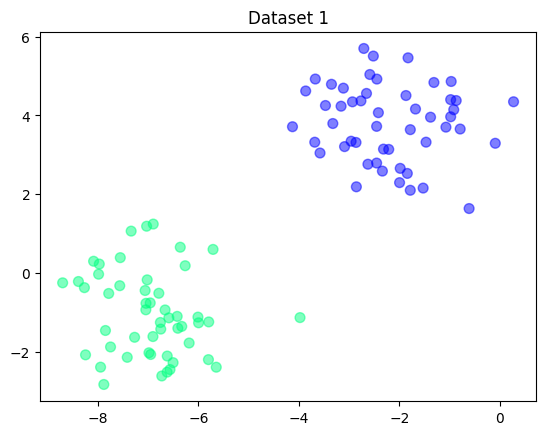

In [76]:
X1, y1 = make_blobs(n_samples=100, centers=2)
y1 = np.where(y1 <= 0, -1, 1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 1")
plt.show()

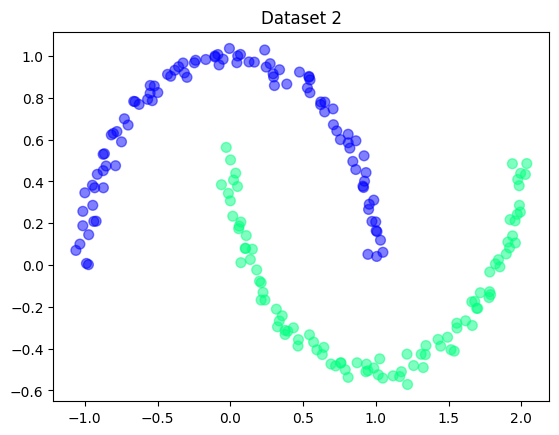

In [94]:
X2, y2 = make_moons(n_samples=200,noise=.03)
y2=np.where(y2<=0,-1,1)
plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 2")
plt.show()

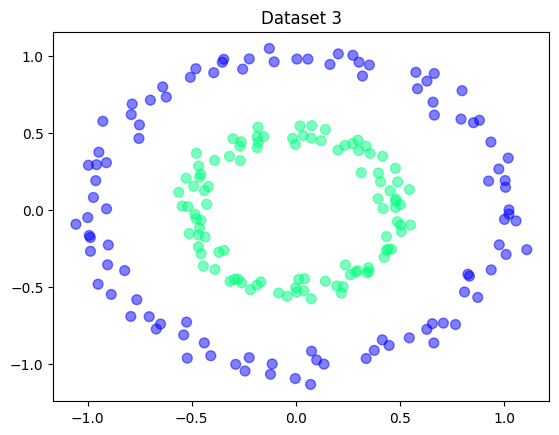

In [82]:
X3, y3 = noisy_circles = make_circles(n_samples=200, factor=.5, noise=.05)
y3=np.where(y3<=0,-1,1)
plt.scatter(X3[:, 0], X3[:, 1], c=y3, s=50, cmap='winter', alpha=.5)
plt.title("Dataset 3")
plt.show()

In [56]:
def get_hyperplane(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

In [57]:
def plot_svm(X, y, w, b, title ='Plot for linear SVM'):    

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X[:,0], X[:,1], marker='o',c=y)

    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = get_hyperplane(x0_1, w, b, 0)
    x1_2 = get_hyperplane(x0_2, w, b, 0)

    x1_1_m = get_hyperplane(x0_1, w, b, -1)
    x1_2_m = get_hyperplane(x0_2, w, b, -1)

    x1_1_p = get_hyperplane(x0_1, w, b, 1)
    x1_2_p = get_hyperplane(x0_2, w, b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--')  # Decision boundary
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k')  # Negative margin
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k')  # Positive margin
    
    x1_min = np.amin(X[:,1])
    x1_max = np.amax(X[:,1])
    ax.set_ylim([x1_min-3,x1_max+3])
    
    plt.title(title)
    plt.show()

For dataset 1, accuracy score: 1.0


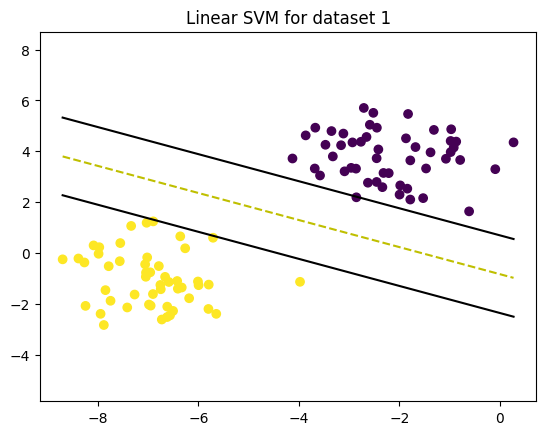

In [77]:
svm=SVM(0.001,0.01,1000)
w1,b1 = svm.fit(X1,y1)
y_pred = svm.pred(X1)
print("For dataset 1, accuracy score:", accuracy_score(y_pred,y1))
plot_svm(X1, y1, w1, b1, title='Linear SVM for dataset 1')

For dataset 2, accuracy score: 0.875


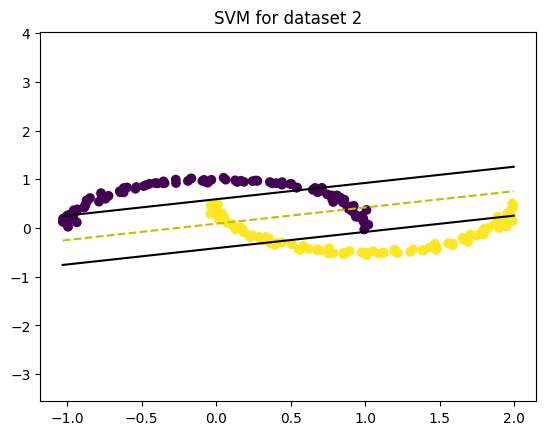

In [85]:
svm=SVM(0.001,0.01,1000)
w2,b2= svm.fit(X2,y2)
y_pred = svm.pred(X2)
print("For dataset 2, accuracy score:", accuracy_score(y_pred,y2))
plot_svm(X2, y2, w2, b2, title='SVM for dataset 2')

For dataset 3, accuracy score: 0.505


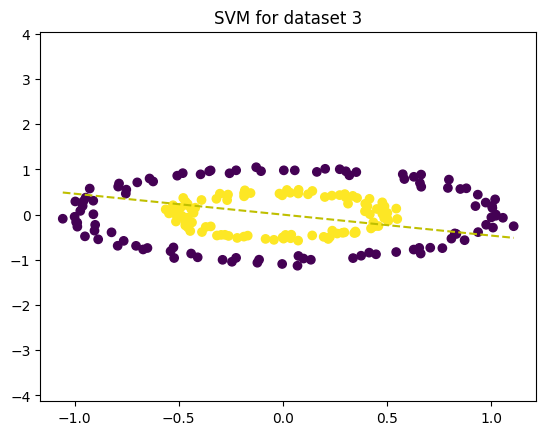

In [86]:
svm=SVM(0.001,0.01,1000)
w3,b3 = svm.fit(X3,y3)
y_pred = svm.pred(X3)
print("For dataset 3, accuracy score:", accuracy_score(y_pred,y3))
plot_svm(X3, y3, w3, b3, title='SVM for dataset 3')

# SVM using SGD

In [87]:
import random

In [92]:
def SVM_SGD(X,Y,lambda_,epoches):
    
    X = np.c_[np.ones(X.shape[0]), X]
    w = np.zeros(X.shape[1]) 
    
    X = np.matrix(X)
    Y = np.matrix(Y) 
    Y = Y.T
    w = np.matrix(w)
    for i in range(1,epoches):
        pos=random.randrange(0,X.shape[0]-1)
        x=X[pos,:]
        y=Y[pos,:]

        eta=1/(lambda_*i)
        cls=y*(w*x.T)

        if cls < 1:
            w = (1 - eta*lambda_)*w + eta*y*x
        elif cls >= 1:
            w = (1 - eta*lambda_)*w

    pred = w*X.T
    pred = np.array(pred)
    result = [1 if val > 0 else -1 for val in pred[0]]
    return np.array(w)[0], result

In [95]:
w1,result1 = SVM_SGD(X1,y1,lambda_ = 0.01,epoches = 1000)
print("For dataset 1, score: ", accuracy_score(result1,y1))

w2,result2 = SVM_SGD(X2,y2,lambda_ = 0.01,epoches = 1000)
print("For dataset 2, score: ", accuracy_score(result2,y2))

w3,result3 = SVM_SGD(X3,y3,lambda_ = 0.01,epoches = 1000)
print("For dataset 3, score: ", accuracy_score(result3,y3))

For dataset 1, score:  0.99
For dataset 2, score:  0.88
For dataset 3, score:  0.5


# SVM For Non-Linear Data (Kernel Method)